# Olympic Data Analysis from 1896 to 2016

### Importing necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading both The CSV files and converting them to DataFrames using The Pandas library.

In [2]:
athlete = pd.DataFrame(pd.read_csv("A:/Olympic Dataset/athlete_events.csv"))
region = pd.DataFrame(pd.read_csv("A:/Olympic Dataset/noc_regions.csv"))

### Viewing the athlete DataFrame to analyse the attrubutes.

In [3]:
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Viewing the region DataFrame to analyse the attrubutes.

In [4]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


### Merginng the athlete and region DataFrames to create one DataFrame with all the Data we have and storing the new DataFrame.

In [5]:
athlete = athlete.merge((region.rename(columns = {"region": "Region", "notes": "Notes"})), how = "left", on = "NOC")

### Checking if the merge happened correctly.

In [6]:
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


### Viewing the shape, info and description of the dataset to analyse the spread of data.

In [7]:
athlete.shape

(271116, 17)

In [8]:
athlete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [9]:
athlete.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### Checking for null values if any and if present then how many and in which columns?

In [10]:
athlete.isna().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [11]:
athlete.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [12]:
null_columns = []
for i in athlete:
    if athlete[i].isna().any():
        null_columns.append(i)
print(null_columns)

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']


### Athlete data from Team India.

In [13]:
athlete[athlete['Team'] == "India"]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264139,132177,Mohammad Anas Yahiya,M,21.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 400 metres Relay,NaN,India,NaN
265876,133029,"Thyadathuvilla Chandrapillai ""T. C."" Yohannan",M,29.0,174.0,62.0,India,IND,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Long Jump,NaN,India,NaN
266934,133554,Sayed Muhammad Yusuf,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN
270912,135480,Geeta Zutshi,F,23.0,167.0,51.0,India,IND,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Women's 800 metres,NaN,India,NaN


### Athlete data from Team United States.

In [14]:
athlete[athlete['Team'] == "United States"]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,USA,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,USA,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,USA,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270850,135458,Rami Zur,M,27.0,175.0,77.0,United States,USA,2004 Summer,2004,Summer,Athina,Canoeing,"Canoeing Men's Kayak Doubles, 500 metres",NaN,USA,NaN
270851,135458,Rami Zur,M,31.0,175.0,77.0,United States,USA,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 500 metres",NaN,USA,NaN
270852,135458,Rami Zur,M,31.0,175.0,77.0,United States,USA,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 1,000 metres",NaN,USA,NaN
271044,135543,"Victor Andrew ""Vic"" Zwolak",M,25.0,175.0,64.0,United States,USA,1964 Summer,1964,Summer,Tokyo,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN,USA,NaN


### Athlete data from Team Great Britain.

In [15]:
athlete[athlete['Team'] == "Great Britain"]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
785,453,Leslie Ablett,M,24.0,NaN,NaN,Great Britain,GBR,1928 Summer,1928,Summer,Amsterdam,Water Polo,Water Polo Men's Water Polo,NaN,UK,NaN
786,453,Leslie Ablett,M,32.0,NaN,NaN,Great Britain,GBR,1936 Summer,1936,Summer,Berlin,Water Polo,Water Polo Men's Water Polo,NaN,UK,NaN
888,509,Gary Abraham,M,17.0,175.0,64.0,Great Britain,GBR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 100 metres Backstroke,NaN,UK,NaN
889,509,Gary Abraham,M,17.0,175.0,64.0,Great Britain,GBR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 4 x 100 metres Medley Relay,NaN,UK,NaN
890,509,Gary Abraham,M,21.0,175.0,64.0,Great Britain,GBR,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Backstroke,NaN,UK,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269996,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,UK,NaN
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,UK,NaN
269998,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,UK,NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,UK,NaN


### Top 10 Teams with the highest participation count.

In [16]:
athlete.Team.value_counts().head(10)

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

### Top 10 teams with the lowest participation count.

In [17]:
athlete.Team.value_counts().tail(10)

Laurea-1         1
Dick-8           1
Brentina         1
Carabinier-15    1
Crabe I-2        1
Nrnberg          1
Verveine-41      1
Bremen           1
Cuxhaven         1
Femur-18         1
Name: Team, dtype: int64

### Plotting a bar graph for the top 10 teams with most number of participation using the matplotlib ans seaborn libraries.

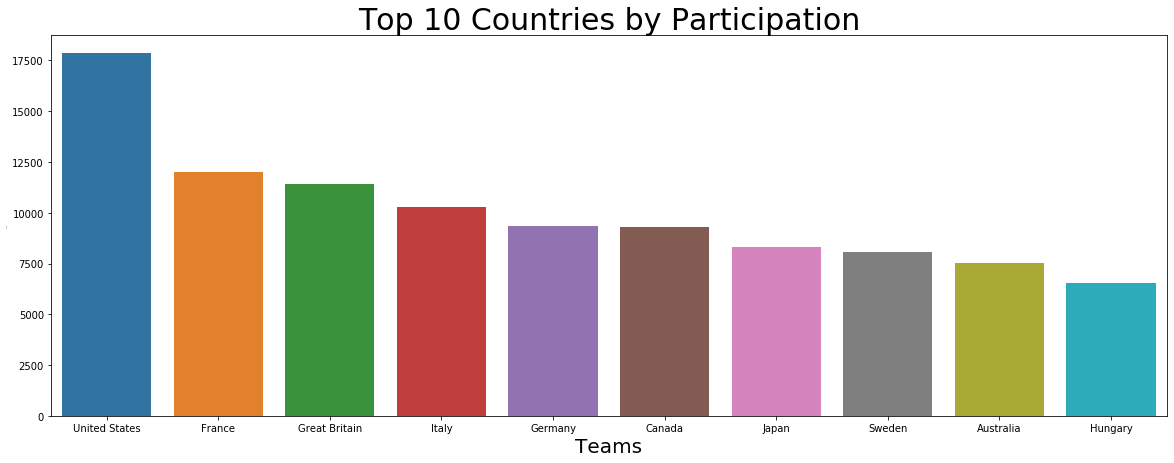

In [18]:
plt.figure(figsize=(20,7))
plt.title("Top 10 Countries by Participation", size = 30)
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.xlabel("Teams", size = 20)
plt.ylabel("No. of Participations", size = 0)
sns.barplot(x = athlete.Team.value_counts().head(10).index, y = athlete.Team.value_counts().head(10))
plt.show()

### Plotting the age distribution of the athletes using a histogram from the matplotlib library.

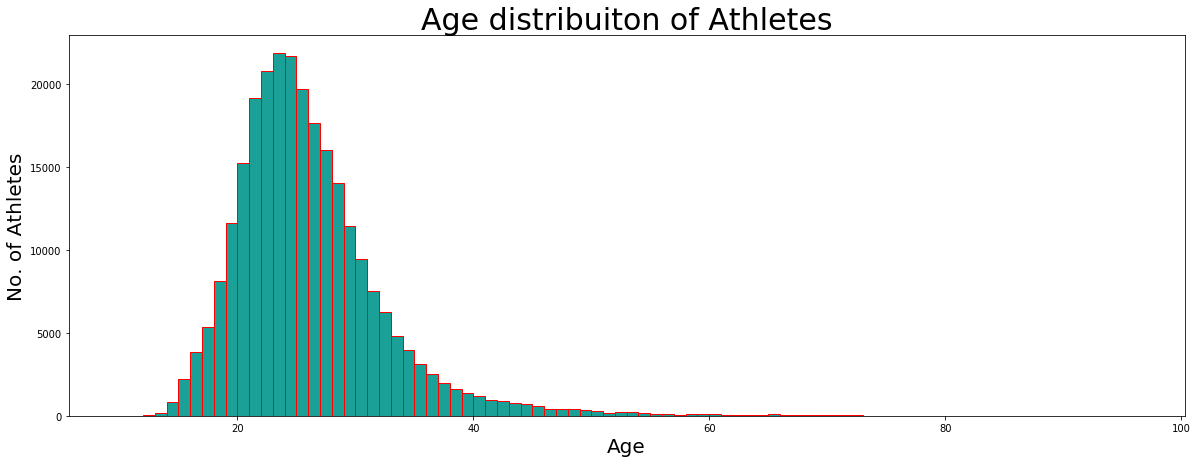

In [19]:
plt.figure(figsize=(20, 7))
plt.title("Age distribuiton of Athletes", size = 30)
plt.xlabel("Age", size = 20)
plt.ylabel("No. of Athletes", size = 20)
plt.hist(athlete['Age'], bins = np.arange(10, 97, 1), color = ('#1BA098FF'), edgecolor = ('#FF0000FF'))
plt.show()

### Finding all the sports played in the summer olympics.

In [20]:
athlete[athlete['Season'] == 'Summer']['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

### Finding all the sports played in the winter olympics.

In [21]:
athlete[athlete['Season'] == 'Winter']['Sport'].unique()

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

### Count of Athletes by Gender.

In [22]:
athlete['Sex'].value_counts()

M    196594
F     74522
Name: Sex, dtype: int64

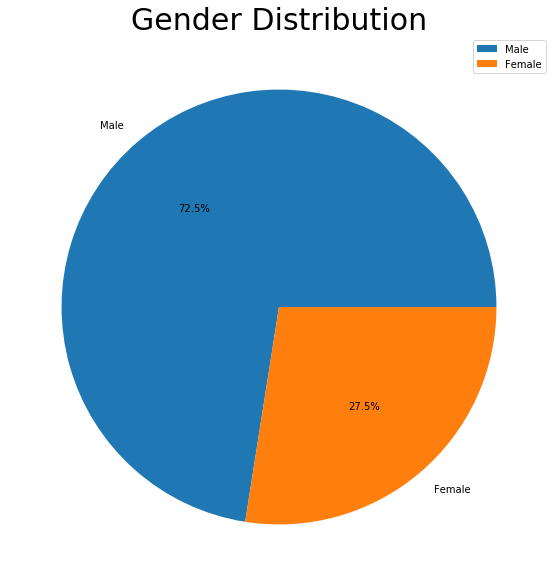

In [23]:
plt.figure(figsize=(20, 10))
plt.title('Gender Distribution', size = 30)
plt.pie(athlete['Sex'].value_counts(), labels = ['Male', 'Female'], autopct="%1.1f%%")
plt.legend()
plt.show()

### Count of Female athletes.

### Count of participants in each sport catogory.

In [24]:
print("{:<26s}|{:>6s}".format("Sport", "Count"))
print("-"*26+"|"+"-"*6)
for i in athlete['Sport'].unique():
    print("{:<26s}|{:>6d}" .format(i, athlete[athlete['Sport'] == i]['Sport'].count()))

Sport                     | Count
--------------------------|------
Basketball                |  4536
Judo                      |  3801
Football                  |  6745
Tug-Of-War                |   170
Speed Skating             |  5613
Cross Country Skiing      |  9133
Athletics                 | 38624
Ice Hockey                |  5516
Swimming                  | 23195
Badminton                 |  1457
Sailing                   |  6586
Biathlon                  |  4893
Gymnastics                | 26707
Art Competitions          |  3578
Alpine Skiing             |  8829
Handball                  |  3665
Weightlifting             |  3937
Wrestling                 |  7154
Luge                      |  1479
Water Polo                |  3846
Hockey                    |  5417
Rowing                    | 10595
Bobsleigh                 |  3058
Fencing                   | 10735
Equestrianism             |  6344
Shooting                  | 11448
Boxing                    |  6047
Taekwondo     

### Count of participants in each summer sport.

In [25]:
print("{:<20s}|{:>6s}".format("Sport", "Count"))
print("-"*20+"|"+"-"*6)
for i in athlete[athlete['Season'] == 'Summer']['Sport'].unique():
    print("{:<20s}|{:>6d}" .format(i, athlete[athlete['Sport'] == i]['Sport'].count()))

Sport               | Count
--------------------|------
Basketball          |  4536
Judo                |  3801
Football            |  6745
Tug-Of-War          |   170
Athletics           | 38624
Swimming            | 23195
Badminton           |  1457
Sailing             |  6586
Gymnastics          | 26707
Art Competitions    |  3578
Handball            |  3665
Weightlifting       |  3937
Wrestling           |  7154
Water Polo          |  3846
Hockey              |  5417
Rowing              | 10595
Fencing             | 10735
Equestrianism       |  6344
Shooting            | 11448
Boxing              |  6047
Taekwondo           |   606
Cycling             | 10859
Diving              |  2842
Canoeing            |  6171
Tennis              |  2862
Modern Pentathlon   |  1677
Golf                |   247
Softball            |   478
Archery             |  2334
Volleyball          |  3404
Synchronized Swimming|   909
Table Tennis        |  1955
Baseball            |   894
Rhythmic Gymnastics

### Count of participants in each winter sport.

In [26]:
print("{:<26s}|{:>6s}".format("Sport", "Count"))
print("-"*26+"|"+"-"*6)
for i in athlete[athlete['Season'] == 'Winter']['Sport'].unique():
    print("{:<26s}|{:>6d}" .format(i, athlete[athlete['Sport'] == i]['Sport'].count()))

Sport                     | Count
--------------------------|------
Speed Skating             |  5613
Cross Country Skiing      |  9133
Ice Hockey                |  5516
Biathlon                  |  4893
Alpine Skiing             |  8829
Luge                      |  1479
Bobsleigh                 |  3058
Figure Skating            |  2298
Nordic Combined           |  1344
Freestyle Skiing          |   937
Ski Jumping               |  2401
Curling                   |   463
Snowboarding              |   936
Short Track Speed Skating |  1534
Skeleton                  |   199
Military Ski Patrol       |    24
Alpinism                  |    25


### Count of Male and Female participants in each sport category.

In [27]:
gender_count = {}
print("{:<26s}|{:>14s}|{:>14s}".format("Sport", " Male Count", "Female Count"))
print("-"*26 + "|" + "-"*14 + "|" + "-"*14)
for i in athlete['Sport'].unique():
    gender_count[i] = [athlete[(athlete['Sex'] == 'M') & (athlete['Sport'] == i)]['Sport'].count(), athlete[(athlete['Sex'] == 'F') & (athlete['Sport'] == i)]['Sport'].count()]
    print("{:<26s}|{:>14d}|{:>14d}" .format(i, athlete[(athlete['Sex'] == 'M') & (athlete['Sport'] == i)]['Sport'].count(), athlete[(athlete['Sex'] == 'F') & (athlete['Sport'] == i)]['Sport'].count()))

Sport                     |    Male Count|  Female Count
--------------------------|--------------|--------------
Basketball                |          3280|          1256
Judo                      |          2708|          1093
Football                  |          5733|          1012
Tug-Of-War                |           170|             0
Speed Skating             |          3532|          2081
Cross Country Skiing      |          5748|          3385
Athletics                 |         26958|         11666
Ice Hockey                |          4762|           754
Swimming                  |         13345|          9850
Badminton                 |           717|           740
Sailing                   |          5660|           926
Biathlon                  |          3030|          1863
Gymnastics                |         17578|          9129
Art Competitions          |          3201|           377
Alpine Skiing             |          5431|          3398
Handball                  |    

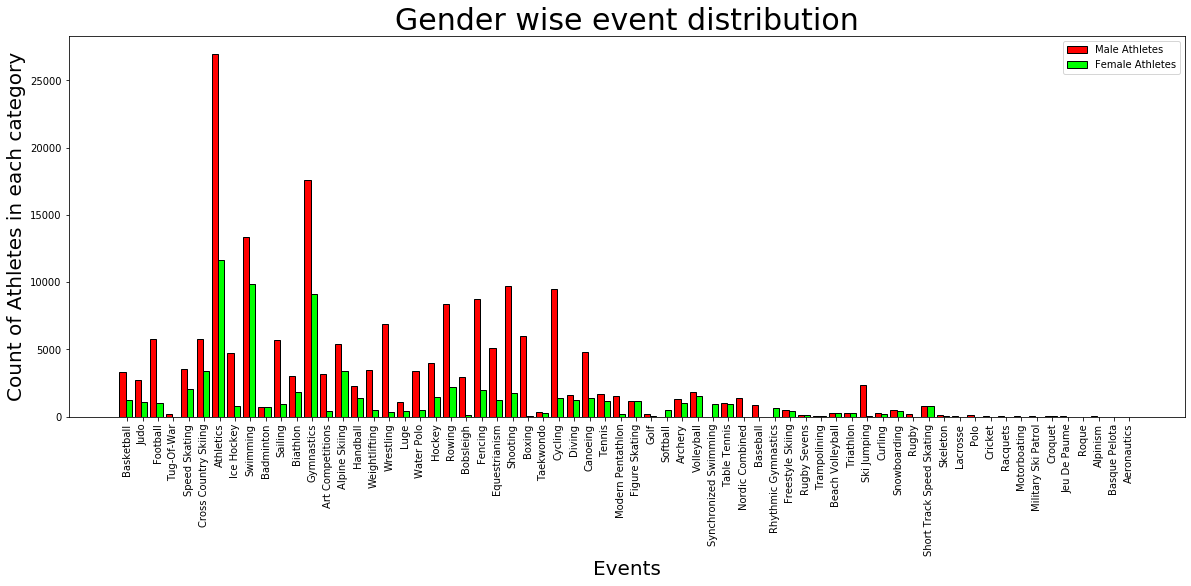

In [28]:
plt.figure(figsize=(20,7))
plt.title("Gender wise event distribution", size = 30)
plt.xlabel("Events", size = 20)
plt.ylabel("Count of Athletes in each category", size = 20)
x = np.arange(len(list(gender_count.values())))
plt.bar(x-0.2,list(list(zip(*list(gender_count.values())))[0]), 0.4, label="Male Athletes", color = ('#FF0000FF'), edgecolor = ('#000000FF'))
plt.bar(x+0.2,list(list(zip(*list(gender_count.values())))[1]), 0.4, label="Female Athletes", color = ('#00FF00FF'), edgecolor = ('#000000FF'))
plt.xticks(x+0.1, gender_count.keys(), rotation = 90)
plt.legend()
plt.show()

### Athlete count each year since the inception of the Olympics.

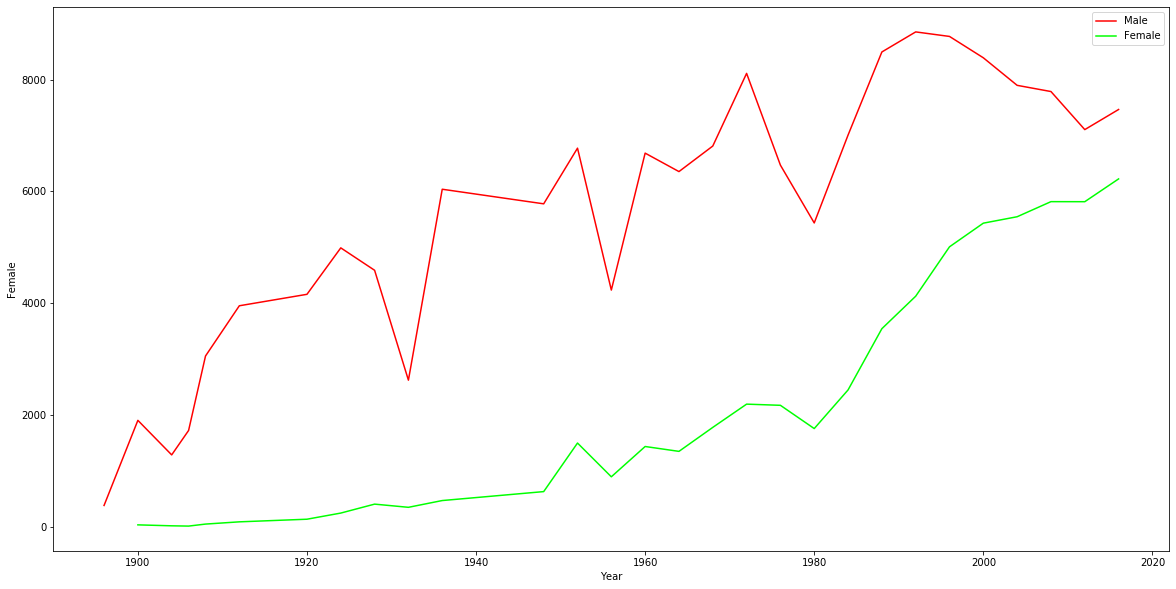

In [29]:
plt.figure(figsize=(20,10))
sns.lineplot(x = 'Year', y = 'Male', data = athlete[(athlete['Sex'] == 'M') & (athlete['Season'] == 'Summer')][['Sex', 'Year']].groupby('Year').count().reset_index().rename(columns={'Sex':'Male'}), color = '#FF0000FF')
sns.lineplot(x = 'Year', y = 'Female', data = athlete[(athlete['Sex'] == 'F') & (athlete['Season'] == 'Summer')][['Sex', 'Year']].groupby('Year').count().reset_index().rename(columns={'Sex':'Female'}), color = '#00FF00FF')
plt.legend(labels = ['Male', 'Female'])
plt.show()

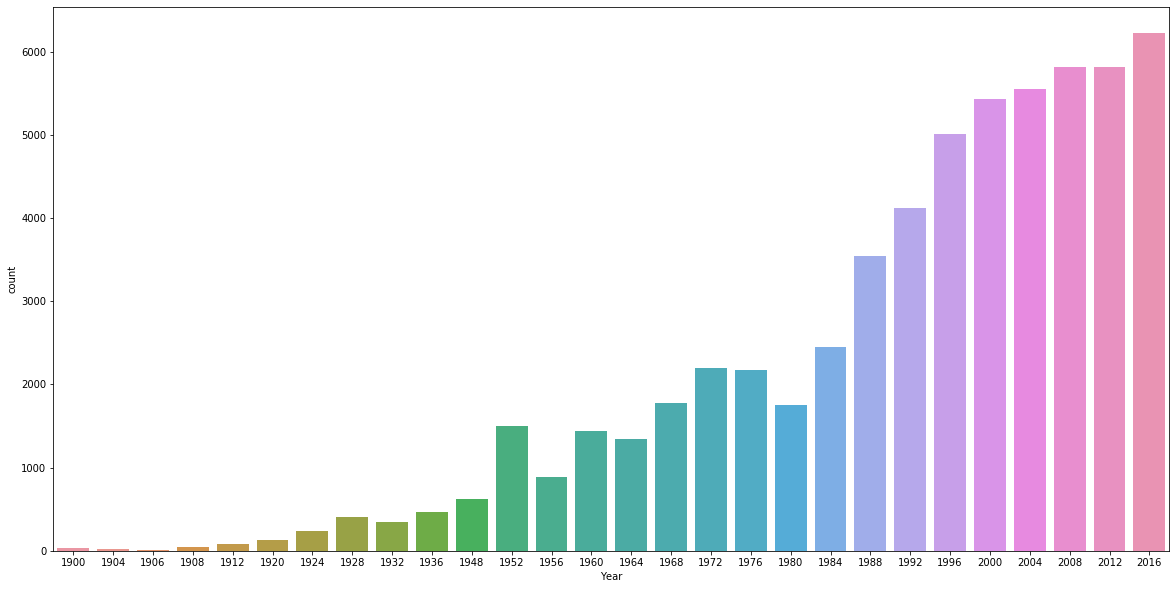

In [30]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Year', data = athlete[(athlete['Sex'] == 'F') & (athlete['Season'] == 'Summer')])
plt.show()

In [31]:
athlete[athlete['Medal'] == 'Gold']['Region'].value_counts().reset_index(name='Medal').head(50)

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575
5,France,501
6,Sweden,479
7,Canada,463
8,Hungary,432
9,Norway,378


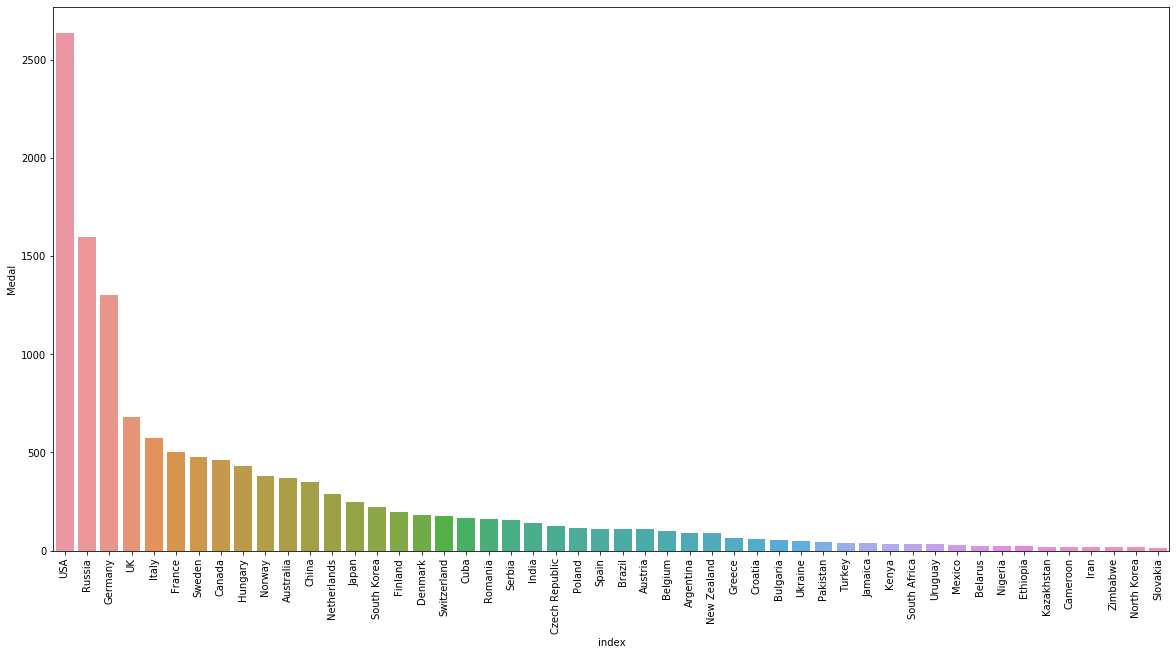

In [32]:
plt.figure(figsize=(20, 10))
sns.barplot(x = 'index', y = 'Medal', data = athlete[athlete['Medal'] == 'Gold']['Region'].value_counts().reset_index(name='Medal').head(50))
plt.xticks(rotation = 90)
plt.show()

In [33]:
athlete[(athlete['Year'] == max(athlete['Year'])) & (athlete['Medal'] == 'Gold')]['Region'].value_counts().reset_index(name='Medals')

,index,Medals
0,USA,139
1,UK,64
2,Russia,52
3,Germany,49
4,China,46
5,Brazil,36
6,Australia,23
7,Argentina,21
8,France,20
9,Japan,17


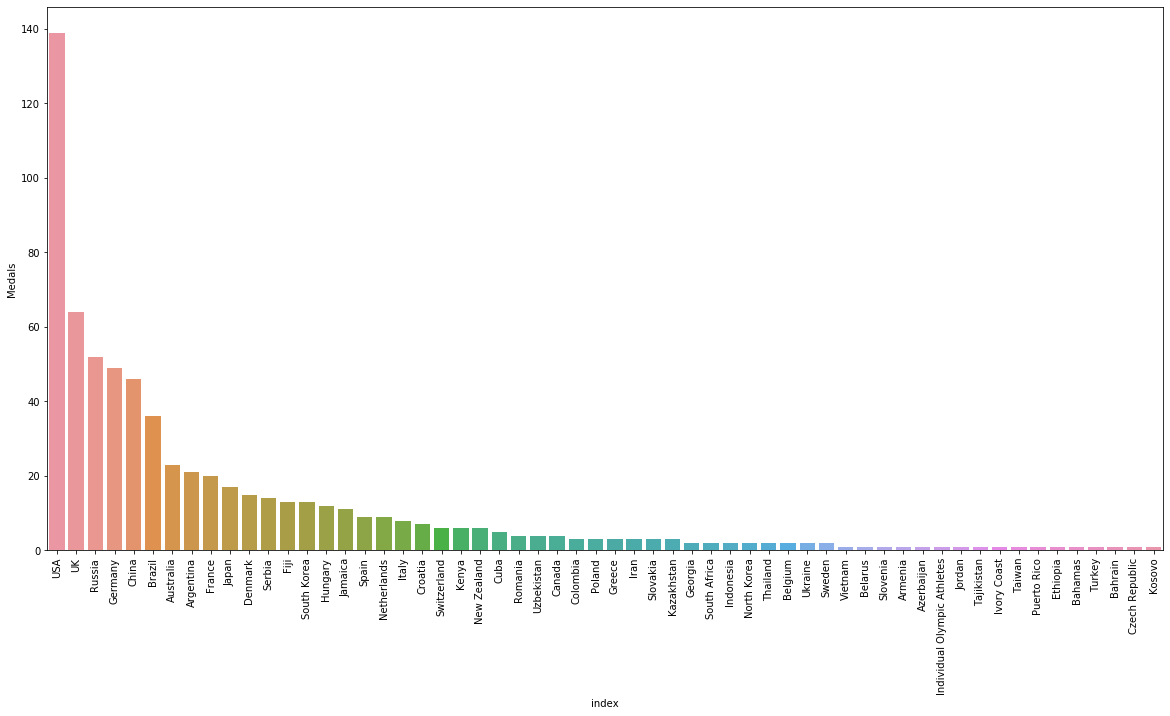

In [34]:
plt.figure(figsize=(20, 10))
sns.barplot(x = 'index', y = 'Medals', data = athlete[(athlete['Year'] == max(athlete['Year'])) & (athlete['Medal'] == 'Gold')]['Region'].value_counts().reset_index(name='Medals'))
plt.xticks(rotation=90)
plt.show()